## About the Project
#### Daily Life Tracker Project
Analyze how daily habits like sleep, work, and screen time affect productivity.


### import the libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###  Load the Dataset

In [61]:
df= pd.read_csv('daily_life_data.csv')
print(df)

          Date  Sleep Hours  Work Hours  Screen Time  Productivity Score
0   2025-01-01          8.1         6.4          7.9                  65
1   2025-01-02          6.3         8.8          4.1                  94
2   2025-01-03          8.0         7.4          5.3                  84
3   2025-01-04          8.7         8.4          4.7                  71
4   2025-01-05          7.7         6.7          6.8                  71
..         ...          ...         ...          ...                 ...
85  2025-03-27          7.4         9.7          6.0                  82
86  2025-03-28          8.6         6.3          5.4                  86
87  2025-03-29          8.0         6.5          4.2                  75
88  2025-03-30          8.5         7.8          4.6                  79
89  2025-03-31          6.4        10.0          7.0                  86

[90 rows x 5 columns]


### Convert Date Column

In [62]:
# Convert the 'Date' column to datetime format
# ---------------------------------------------
df['Date'] = pd.to_datetime(df['Date'])  # Converting 'Date' column to datetime
print("Date column is converted to datetime format successfully")  # Print confirmation message


Date column is converted to datetime format successfully


### Initial Data Overview

In [63]:
# Basic Statistical Summary and Data Information
# ------------------------------------------------
# Get statistical summary of the data (count, mean, min, 25%, max, std, etc.)
df.describe()  # Displays summary statistics for numeric columns

# Get information about the DataFrame (columns, data types, non-null values)
df.info()  # Provides information on the DataFrame's structure (data types, non-null count, etc.)

# Check for missing values in each column
df.isnull().sum()  # Counts the number of missing values in each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                90 non-null     datetime64[ns]
 1   Sleep Hours         90 non-null     float64       
 2   Work Hours          90 non-null     float64       
 3   Screen Time         90 non-null     float64       
 4   Productivity Score  90 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 3.6 KB


Date                  0
Sleep Hours           0
Work Hours            0
Screen Time           0
Productivity Score    0
dtype: int64

###  Weekly Averages

In [64]:
# Setting 'Date' as the Index and Resampling Data for Weekly Averages
# -------------------------------------------------------------------
# Ensure 'Date' is a column in the DataFrame and set it as the index
df.set_index('Date', inplace=True)  # Correct syntax to set 'Date' column as the index

# Resample the data by week and calculate the mean for each week
weekly_avg = df.resample('W').mean()  # Resample data by week and compute weekly averages

# Print the weekly average data
print(weekly_avg)  # Output the resampled weekly average values


            Sleep Hours  Work Hours  Screen Time  Productivity Score
Date                                                                
2025-01-05     7.760000    7.540000     5.760000           77.000000
2025-01-12     8.085714    7.885714     6.157143           75.285714
2025-01-19     8.114286    8.314286     6.271429           82.428571
2025-01-26     7.728571    7.571429     6.714286           73.857143
2025-02-02     6.700000    8.028571     5.442857           79.000000
2025-02-09     7.328571    8.671429     5.971429           78.714286
2025-02-16     7.914286    8.085714     6.614286           76.142857
2025-02-23     7.614286    8.042857     5.942857           80.000000
2025-03-02     7.642857    7.957143     6.542857           86.714286
2025-03-09     7.300000    8.414286     5.642857           72.714286
2025-03-16     7.242857    8.471429     5.671429           87.571429
2025-03-23     7.414286    7.742857     6.414286           74.428571
2025-03-30     7.785714    7.97142

### Correlation Matrix and Heatmap

<Figure size 1000x800 with 0 Axes>

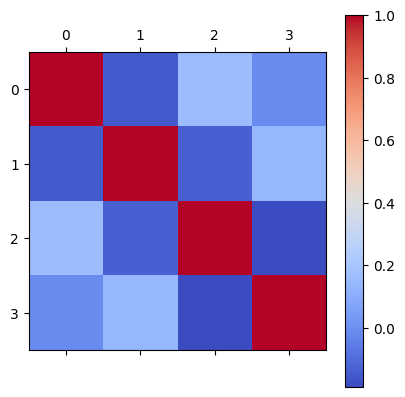

In [65]:
# Step 1: Calculate the Correlation Matrix
# ----------------------------------------
# The `df.corr()` function calculates the correlation matrix of all numeric columns
# in the DataFrame `df`. This matrix shows how each variable is correlated with others.
correlation_matrix = df.corr()

# Step 2: Create a Figure for the Heatmap
# --------------------------------------
# The `plt.figure()` function creates a new figure for the heatmap plot.
# We set the figure size to (10, 8) to make it more readable and spacious.
plt.figure(figsize=(10, 8))

# Step 3: Plot the Correlation Matrix as a Heatmap
# ------------------------------------------------
# The `plt.matshow()` function is used to display the correlation matrix as a heatmap.
# We use the 'coolwarm' colormap to represent the correlation values.
# Red represents strong positive correlation, and blue represents strong negative correlation.
plt.matshow(correlation_matrix, cmap='coolwarm')

# Step 4: Add Color Bar
# ---------------------
# The color bar provides the scale for the correlation values shown on the heatmap.
# It helps interpret the color range and the corresponding correlation values.
plt.colorbar()

# Step 5: Save the Heatmap as an Image
# ------------------------------------
# The `plt.savefig()` function saves the heatmap as a .png image file.
# You can change the file name and format (e.g., .jpg, .pdf) if needed.
plt.savefig('correlation_matrix_heatmap.png')

# Step 6: Display the Heatmap
# ---------------------------
# Finally, the `plt.show()` function displays the heatmap on the screen.
# This is used to visualize the plot in your environment.
plt.show()


### Scatter Plot: Screen Time vs Productivity

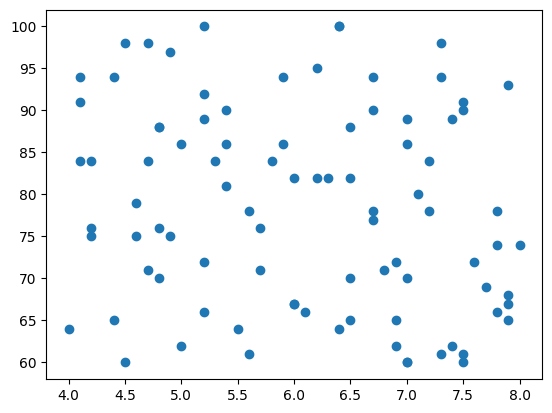

In [66]:
# Step 1: Extract the Data for Plotting
# -------------------------------------
# We are extracting the 'Screen Time' and 'Productivity Score' columns
# from the DataFrame `df` to plot them on the x and y axes, respectively.
screen_time = df['Screen Time']
productivity_score = df['Productivity Score']

# Step 2: Create a Scatter Plot
# -----------------------------
# The `plt.scatter()` function creates a scatter plot,
# plotting the 'Screen Time' on the x-axis and 'Productivity Score' on the y-axis.
# This helps visualize the relationship between these two variables.
plt.scatter(screen_time, productivity_score)

# Step 3: Save the Plot as an Image
# ---------------------------------
# The `plt.savefig()` function saves the scatter plot as a .png image file.
# You can change the filename or file extension (e.g., .jpg, .pdf) as needed.
plt.savefig('scatter_plot.png')

# Step 4: Display the Plot
# ------------------------
# Finally, we use `plt.show()` to display the scatter plot on the screen.
plt.show()


###  Box Plots for Variability

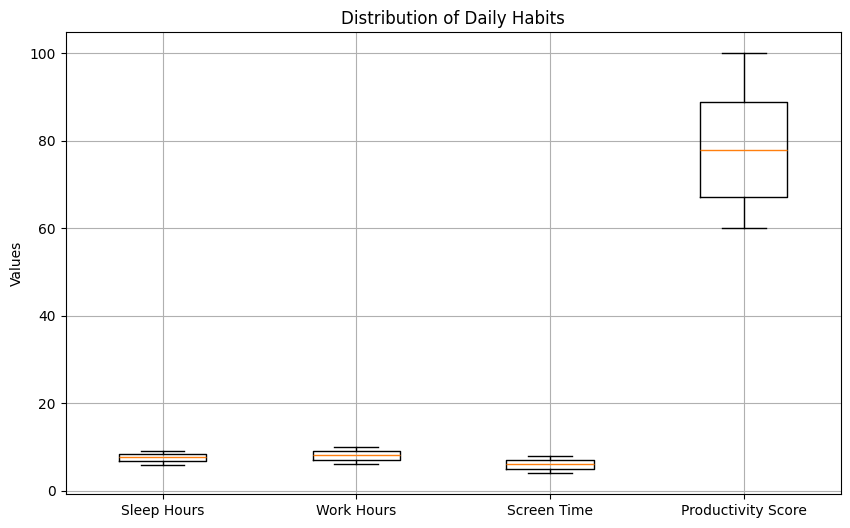

In [71]:
import matplotlib.pyplot as plt

# Select the relevant columns
data = [df['Sleep Hours'], df['Work Hours'], df['Screen Time'], df['Productivity Score']]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data,  tick_labels=['Sleep Hours', 'Work Hours', 'Screen Time', 'Productivity Score'])

# Set title and labels
plt.title('Distribution of Daily Habits')
plt.ylabel('Values')
plt.grid(True)

# Show the plot
plt.show()
